In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('../data/processed/merged_covid_data.csv', index_col=0)
df.head()



,country,date,confirmed,deaths,recovered,new_cases,new_deaths,new_recovered,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,C6M_Stay at home requirements,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Afghanistan,2020-01-22,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2020-01-23,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


0           0.0
1           0.0
2           0.0
3           0.0
4           4.0
         ...   
1138        0.0
1139        0.0
1140        0.0
1141        0.0
1142    13926.0
Name: new_cases, Length: 1143, dtype: float64


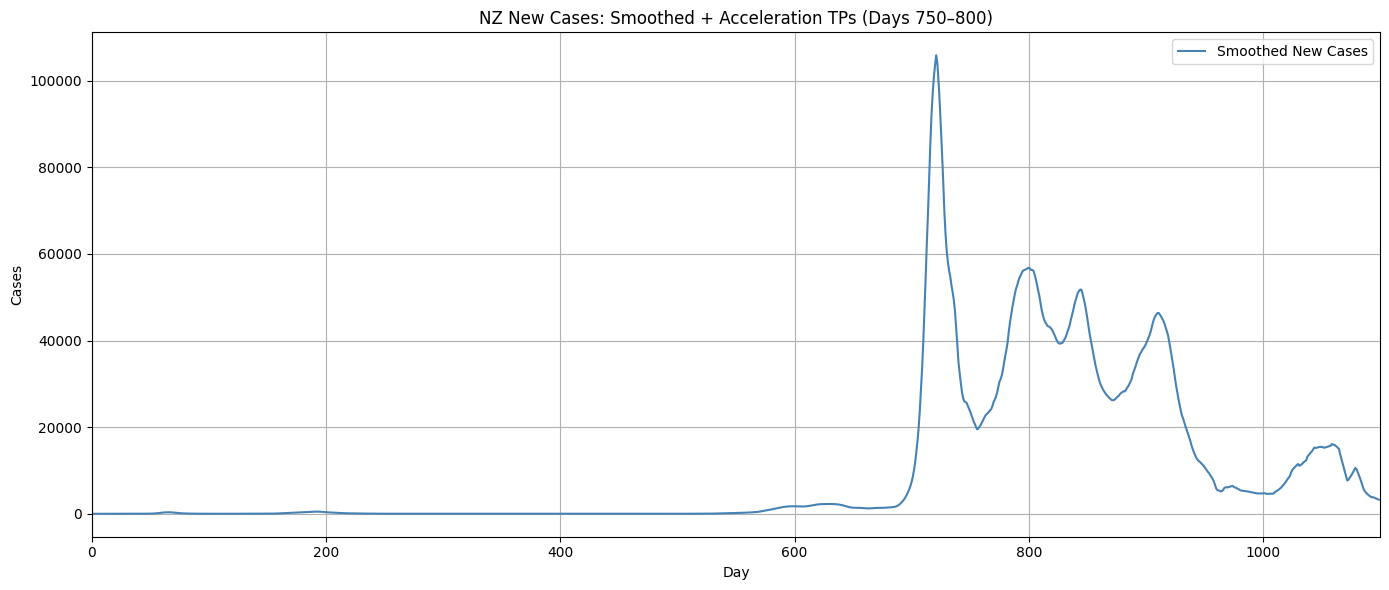

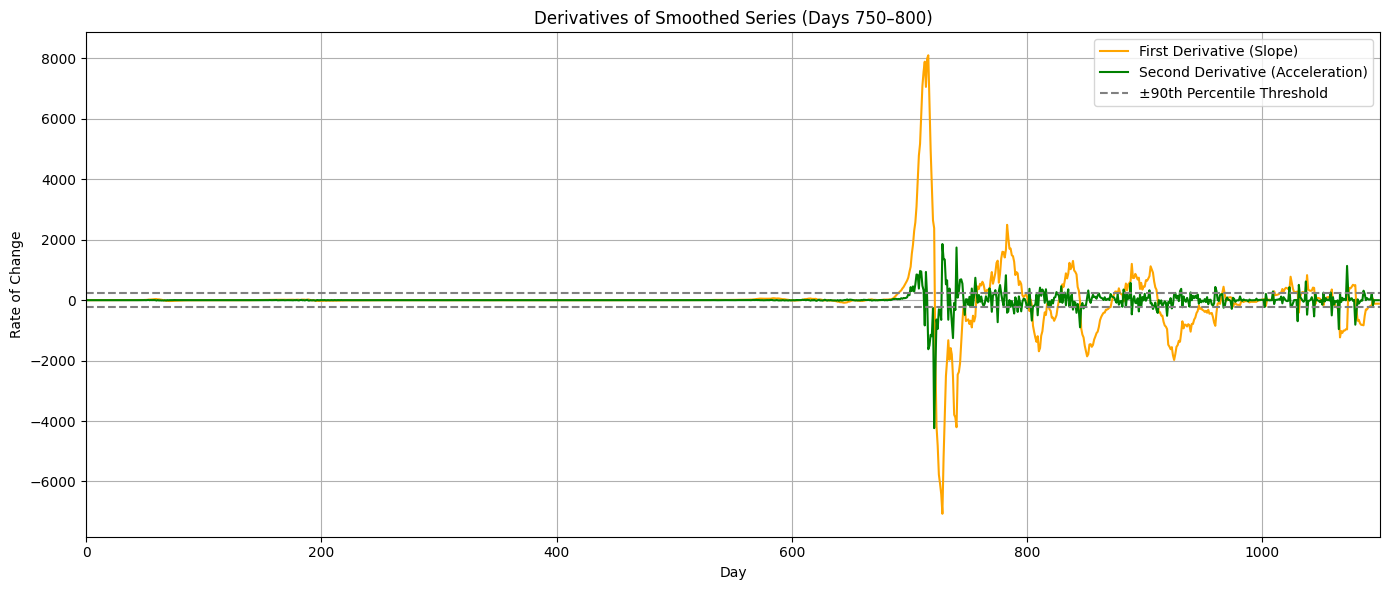

In [25]:
country = "Australia"
df_country = df[df["country"] == country]
series = df_country["new_cases"]
series.index = range(len(series))

print(series)

# Step 1: Smooth the series
smoothed = series.rolling(window=7, center=True, min_periods=1).mean().rolling(window=7, center=True, min_periods=1).mean()

# Step 2: First and second derivative
d1 = smoothed.diff()
d2 = smoothed.shift(-1) - 2 * smoothed + smoothed.shift(1)


# Step 3: Detect sharp changes (|2nd derivative| > 90th percentile)
threshold = np.nanpercentile(np.abs(d2), 90)
spike_indices = np.where(np.abs(d2) > threshold)[0]
spike_dates = smoothed.index[spike_indices]
spike_values = smoothed.iloc[spike_indices]

start, end = 0, 1100
plt.figure(figsize=(14, 6))
plt.plot(smoothed.index[start:end], smoothed.iloc[start:end], label="Smoothed New Cases", color="steelblue")
#plt.scatter(spike_indices, spike_values, color="red", label="Acceleration TPs", zorder=10)
plt.xlim(start, end)
plt.title("NZ New Cases: Smoothed + Acceleration TPs (Days 750–800)")
plt.xlabel("Day")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(d1.index[start:end], d1.iloc[start:end], label="First Derivative (Slope)", color="orange")
plt.plot(d2.index[start:end], d2.iloc[start:end], label="Second Derivative (Acceleration)", color="green")
plt.axhline(threshold, color="gray", linestyle="--", label="±90th Percentile Threshold")
plt.axhline(-threshold, color="gray", linestyle="--")
plt.xlim(start, end)
plt.title("Derivatives of Smoothed Series (Days 750–800)")
plt.xlabel("Day")
plt.ylabel("Rate of Change")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

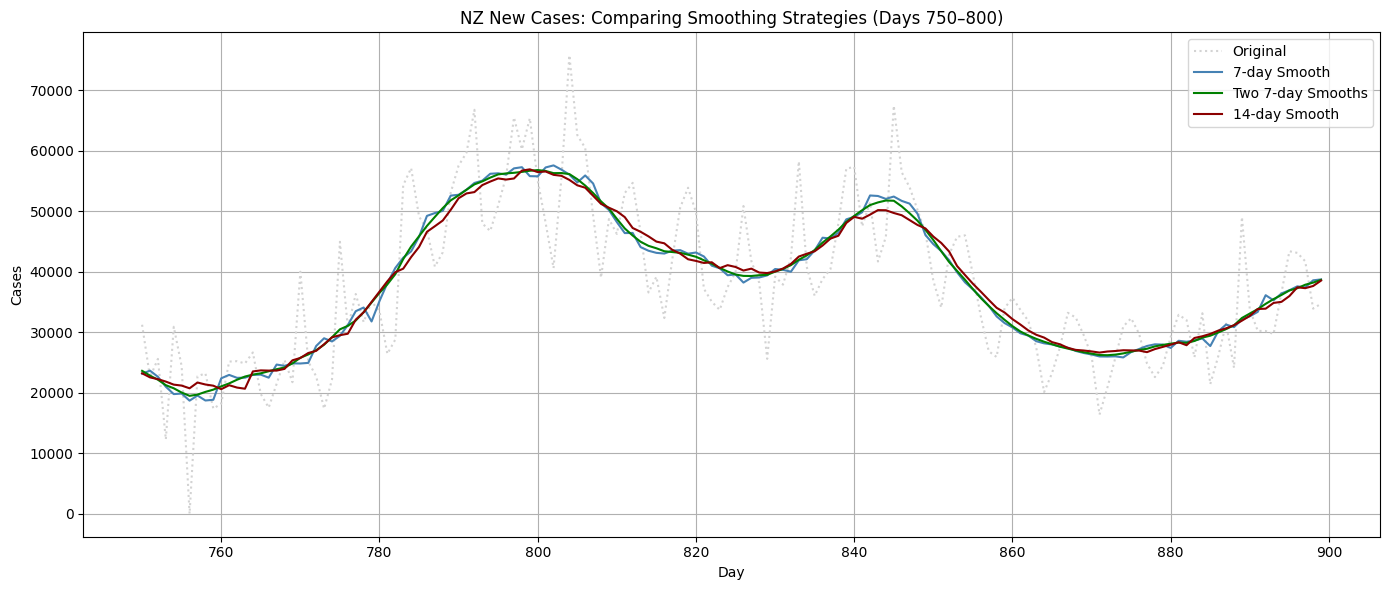

In [26]:
# Apply different smoothing methods
smooth_7 = series.rolling(window=7, center=True, min_periods=1).mean()
smooth_7_twice = smooth_7.rolling(window=7, center=True, min_periods=1).mean()
smooth_14 = series.rolling(window=14, center=True, min_periods=1).mean()

# Plot zoomed section
start, end = 750, 900
plt.figure(figsize=(14, 6))
plt.plot(series[start:end], label="Original", color="lightgray", linestyle="dotted")
plt.plot(smooth_7[start:end], label="7-day Smooth", color="steelblue")
plt.plot(smooth_7_twice[start:end], label="Two 7-day Smooths", color="green")
plt.plot(smooth_14[start:end], label="14-day Smooth", color="darkred")

plt.title("NZ New Cases: Comparing Smoothing Strategies (Days 750–800)")
plt.xlabel("Day")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1138   NaN
1139   NaN
1140   NaN
1141   NaN
1142   NaN
Name: new_cases, Length: 1143, dtype: float64
    index   slope_diff   p_value
0      42    16.966119  0.036244
1      66   -28.186178  0.033167
2      89    15.318577  0.030932
3     154    12.109025  0.007818
4     191   -29.461294  0.006049
5     218    12.269304  0.015095
6     342    -1.343380  0.035870
7     379     0.575796  0.048328
8     386     0.532880  0.048376
9     435     0.706122  0.039781
10    459    -1.318570  0.035036
11    481     0.983660  0.031224
12    510     2.368017  0.049878
13    543     7.902627  0.047187
14    566    41.936501  0.009342
15    591   -39.766872  0.032679
16    629   -75.883544  0.020790
17    664    60.628062  0.043752
18    697  4739.703590  0.028492
19    722 -7534.328910  0.023617
20    746  3474.020185  0.025603
21    797 -2140.730180  0.015241
22    822  1322.863032  0.029508
23    845 -1483.778915  0.036071
24    87

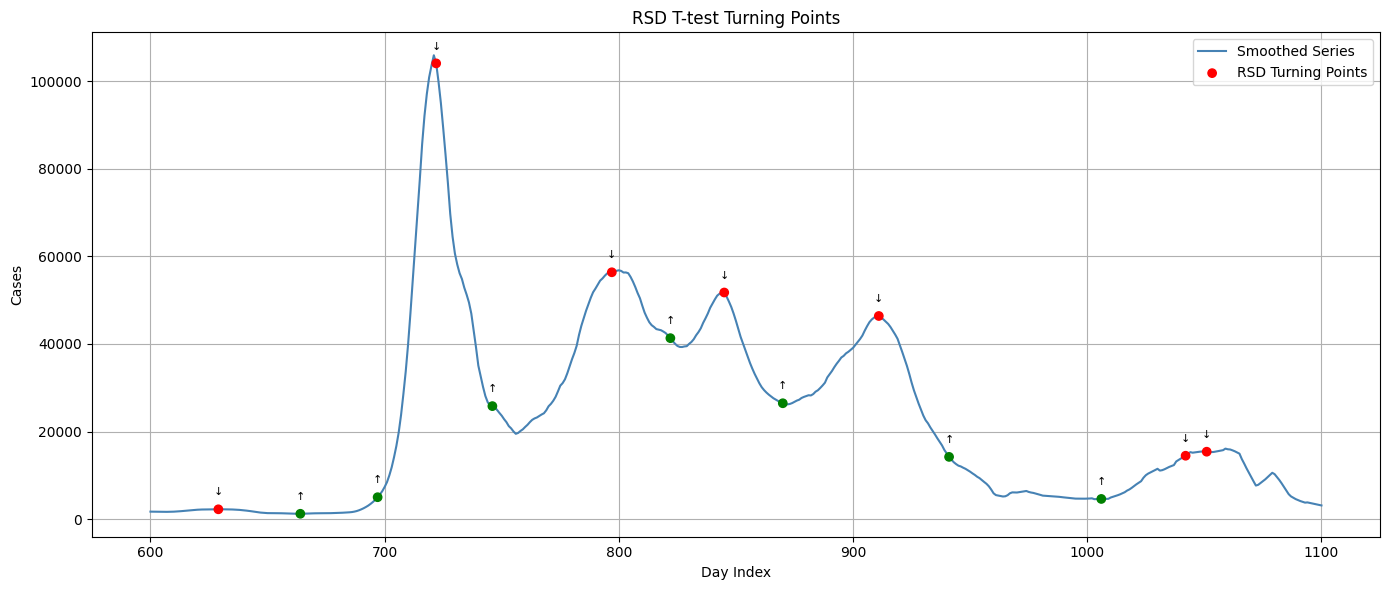

In [ ]:
import pandas as pd
import sys
from pathlib import Path
# Set path to project root (adjust if your notebook is deeper)
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from metrics.find_tp_rsd_ttest import rsd_ttest
import matplotlib.pyplot as plt

def plot_valid_rsd_turning_points(smoothed, rsd_tps, zoom=None, title="RSD T-test Turning Points"):
    """
    Plot smoothed series and mark turning points discovered by RSD t-test.
    
    Parameters:
        smoothed (pd.Series): The smoothed series with possible NaNs
        rsd_tps (pd.DataFrame): DataFrame with 'index', 'slope_diff', 'p_value'
        zoom (tuple): Optional (start_index, end_index) to zoom
    """
    smoothed = smoothed.copy()
    valid_idx = smoothed.dropna().index

    # Filter out TPs that point to NaN in smoothed
    rsd_valid = rsd_tps[rsd_tps["index"].isin(valid_idx)]

    # Optional zoom
    if zoom:
        smoothed = smoothed.loc[zoom[0]:zoom[1]]
        rsd_valid = rsd_valid[(rsd_valid["index"] >= zoom[0]) & (rsd_valid["index"] <= zoom[1])]

    plt.figure(figsize=(14, 6))
    plt.plot(smoothed.index, smoothed.values, label="Smoothed Series", color="steelblue")

    plt.scatter(
        rsd_valid["index"],
        smoothed.loc[rsd_valid["index"]],
        c=["green" if s > 0 else "red" for s in rsd_valid["slope_diff"]],
        label="RSD Turning Points",
        zorder=10
    )

    for _, row in rsd_valid.iterrows():
        plt.annotate("↑" if row["slope_diff"] > 0 else "↓",
                     (row["index"], smoothed.loc[row["index"]]),
                     textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

    plt.title(title)
    plt.xlabel("Day Index")
    plt.ylabel("Cases")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Apply double 7-day rolling smoothing as previously chosen
double_smoothed = series.rolling(7, center=True).mean().rolling(7, center=True).mean()
smoothed = series.rolling(7, center=True).mean().rolling(7, center=True).mean()
print(smoothed)


# Run Zuo RSD t-test
rsd_tps = rsd_ttest(smoothed, T=28, alpha=0.05)
print(rsd_tps) 
print(smoothed)


# Plot with zoom (e.g. days 750–800)
plot_valid_rsd_turning_points(double_smoothed, rsd_tps, zoom=(600, 1100))


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
# Set path to project root (adjust if your notebook is deeper)
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from src.metrics.combined_tp_extraction import extract_combined_turning_points

# Load your dataframe first (assuming 'df' is already defined)
df = pd.read_csv('../data/processed/merged_covid_data.csv', index_col=0)
country = "Australia"
df_country = df[df["country"] == country]
series = df_country["new_cases"]
series.index = range(len(series))



In [24]:
# Detect turning points
combined_tps = extract_combined_turning_points(series, T=28, alpha=0.05, min_separation=7, peak_prominence=50, distance=14,
                                    min_gap_days=14, smooth_window=7, double_smooth=True)

# Smooth the series for plotting
smoothed = series.rolling(7, center=True, min_periods=1).mean().rolling(7, center=True, min_periods=1).mean()




In [25]:
combined_tps

,index,type,source
0,42,up,rsd
1,65,peak,find_peaks
2,89,up,rsd
3,137,trough,find_peaks
4,154,up,rsd
5,192,peak,find_peaks
6,218,up,rsd
7,342,down,rsd
8,379,up,rsd
9,392,trough,find_peaks


In [26]:
import matplotlib.pyplot as plt

def plot_turning_points_with_zoom(smoothed, combined_tps, country="Unknown", zoom=None):
    """
    Plot smoothed series and mark turning points with optional zoom.

    Parameters:
        smoothed (pd.Series): The smoothed time series (with integer index).
        combined_tps (pd.DataFrame): Output from extract_combined_turning_points().
        country (str): Country name for plot title.
        zoom (tuple): (start_index, end_index) to zoom into a time window.
    """
    # Apply zoom if specified
    if zoom:
        start, end = zoom
        smoothed = smoothed.loc[start:end]
        combined_tps = combined_tps[(combined_tps["index"] >= start) & (combined_tps["index"] <= end)]

    plt.figure(figsize=(14, 6))
    plt.plot(smoothed.index, smoothed.values, label="Smoothed Series", color="steelblue")

    for _, row in combined_tps.iterrows():
        if row["index"] in smoothed.index:
            y_val = smoothed.loc[row["index"]]
            color = (
                "green" if row["type"] == "up" else
                "red" if row["type"] == "down" else
                "orange" if row["type"] == "peak" else
                "purple"  # for trough
            )
            plt.scatter(row["index"], y_val, c=color, label=row["type"] + " (" + row["source"] + ")", zorder=10)
            plt.annotate(row["type"], (row["index"], y_val), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

    plt.title(f"Turning Points in {country}" + (f" [{zoom[0]}–{zoom[1]}]" if zoom else ""))
    plt.xlabel("Day Index")
    plt.ylabel("New Cases")
    plt.grid(True)
    # plt.legend()  # optional: disable to avoid duplicate labels
    plt.tight_layout()
    plt.show()


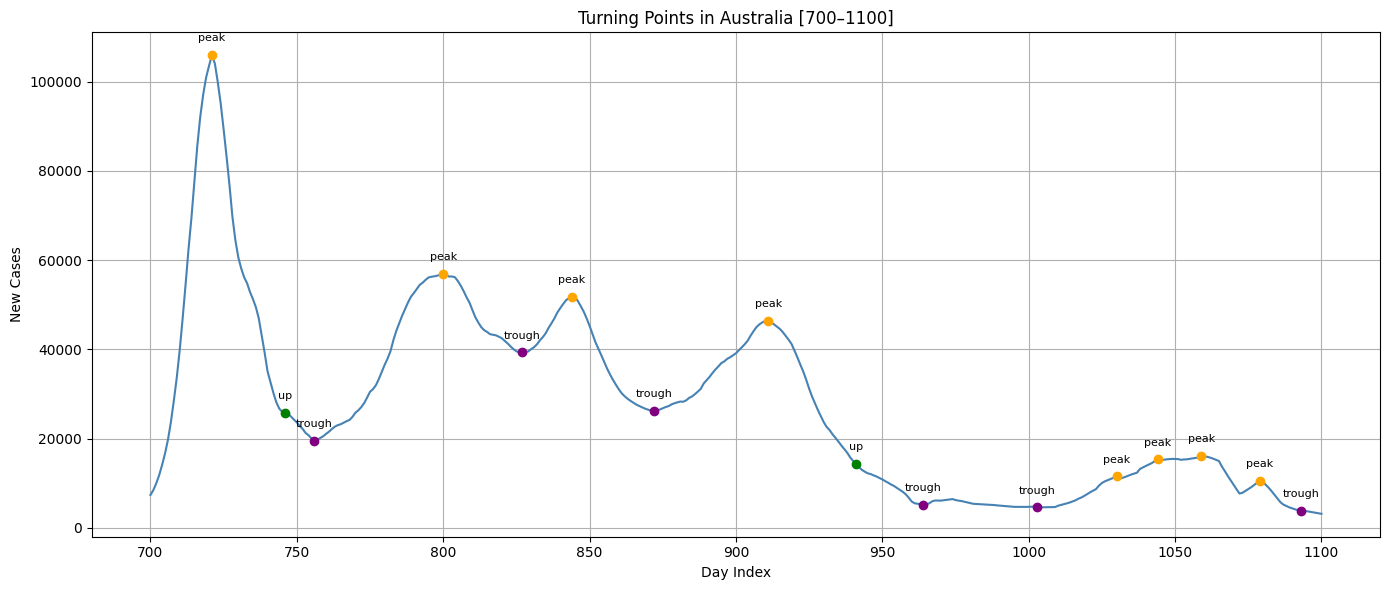

In [28]:
plot_turning_points_with_zoom(smoothed, combined_tps, country="Australia", zoom=(700, 1100))


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Setup path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

from src.models.baseline.lstm import train_and_forecast_lstm

# --- Load dataset ---
df = pd.read_csv("../data/processed/merged_covid_data.csv")
df["date"] = pd.to_datetime(df["date"])

# --- Config ---
config = {
    "countries": ["Australia"],
    "target_var": "new_cases",
    "exogenous_vars": [
        #"retail_and_recreation_percent_change_from_baseline",
        #"GovernmentResponseIndex_Average"
    ],
    "scaler": "min_max",
    "min_max_range": (-1, 1),
    "input_window": 56,
    "forecast_steps": 14,
    "split_ratio": 0.8,
    "lstm_units": 64,
    "dropout_rate": 0.3,
    "epochs": 100,
    "batch_size": 16
}

# --- Run forecasting ---
results_df = train_and_forecast_lstm(df, config)

results_df


c:\Users\guoya\miniconda3\envs\covidmodels\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,country,forecast_origin,true_values,predictions,forecast_dates
0,Australia,2022-07-11,"[44724.00000000001, 44415.0, 47095.0, 38769.0,...","[36342.4453125, 37698.62890625, 38677.95703125...","[2022-07-11 00:00:00, 2022-07-12 00:00:00, 202..."
1,Australia,2022-07-12,"[44415.0, 47095.0, 38769.0, 42723.0, 38914.0, ...","[37925.12890625, 38945.31640625, 39270.1015625...","[2022-07-12 00:00:00, 2022-07-13 00:00:00, 202..."
2,Australia,2022-07-13,"[47095.0, 38769.0, 42723.0, 38914.0, 37787.000...","[39336.3046875, 40099.56640625, 40155.83203125...","[2022-07-13 00:00:00, 2022-07-14 00:00:00, 202..."
3,Australia,2022-07-14,"[38769.0, 42723.0, 38914.0, 37787.00000000001,...","[41139.1328125, 41637.171875, 41429.33203125, ...","[2022-07-14 00:00:00, 2022-07-15 00:00:00, 202..."
4,Australia,2022-07-15,"[42723.0, 38914.0, 37787.00000000001, 51972.99...","[40884.78125, 41574.05078125, 41710.23828125, ...","[2022-07-15 00:00:00, 2022-07-16 00:00:00, 202..."
...,...,...,...,...,...
224,Australia,2023-02-20,"[0.0, 0.0, 0.0, 17698.000000000004, 964.999999...","[8022.966796875, 9675.279296875, 10429.3574218...","[2023-02-20 00:00:00, 2023-02-21 00:00:00, 202..."
225,Australia,2023-02-21,"[0.0, 0.0, 17698.000000000004, 964.99999999999...","[7387.4462890625, 9153.60546875, 9996.39355468...","[2023-02-21 00:00:00, 2023-02-22 00:00:00, 202..."
226,Australia,2023-02-22,"[0.0, 17698.000000000004, 964.9999999999998, 0...","[6814.2529296875, 8652.814453125, 9529.8417968...","[2023-02-22 00:00:00, 2023-02-23 00:00:00, 202..."
227,Australia,2023-02-23,"[17698.000000000004, 964.9999999999998, 0.0, 0...","[6323.642578125, 8201.6513671875, 9074.0830078...","[2023-02-23 00:00:00, 2023-02-24 00:00:00, 202..."


[36342.4453125  37698.62890625 38677.95703125 37598.26953125
 37557.296875   37237.3671875  37809.125      37300.54296875
 35803.48046875 37891.5        37597.7578125  35407.0703125
 35987.1640625  36427.53125   ]
[42368.47265625 43878.625      45105.53125    43406.03515625
 43444.546875   43233.546875   43919.578125   43253.89453125
 41587.37109375 43889.21875    43827.05859375 41086.33203125
 41565.703125   42044.4296875 ]
[27090.54882812 30021.82617188 31518.36523438 28056.24609375
 29292.80078125 29793.41992188 31360.08203125 28684.4375
 28065.20898438 31064.5703125  31599.6640625  28866.07421875
 29253.1328125  29181.60351562]
[16856.88867188 19110.86914062 20114.65039062 17992.00390625
 19035.796875   19338.0234375  20256.20117188 18472.20898438
 18123.21289062 20414.96875    20376.52929688 18864.01367188
 19226.43359375 19188.74609375]
[12584.98925781 14548.19921875 15453.30273438 14060.95800781
 14894.77148438 15207.26171875 15929.98242188 14214.29296875
 14263.69140625 16195.5

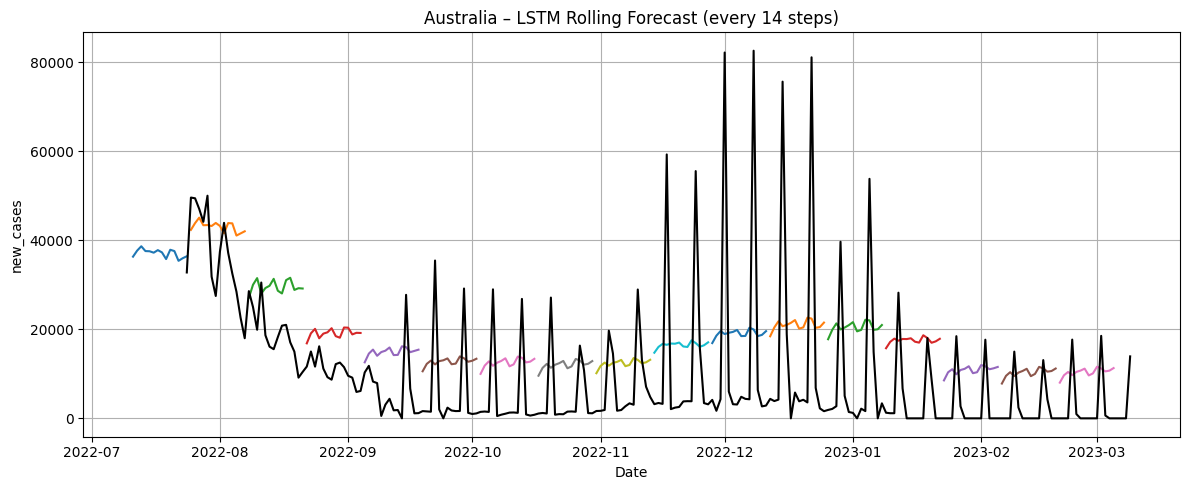

In [ ]:
step = config["forecast_steps"]

for country in config["countries"]:
    country_df = results_df[results_df["country"] == country].reset_index(drop=True)

    # Sample every `forecast_steps` (e.g., every 14th forecast)
    sampled = country_df.iloc[::step]
    #print(sampled)

    plt.figure(figsize=(12, 5))

    for _, row in sampled.iterrows():
        origin_date = pd.to_datetime(row["forecast_origin"])
        forecast_dates = pd.date_range(start=origin_date, periods=step, freq="D")
        preds = np.array(row["predictions"])
        #print(preds)

        if preds.ndim == 2:
            preds = preds[0]  # flatten (1, 14)

        plt.plot(forecast_dates, preds, label=f"Forecast from {origin_date.date()}")

    # True values
    actual_series = df[df["country"] == country].sort_values("date")
    split_idx = int(len(actual_series) * config["split_ratio"])
    actual_test = actual_series.iloc[split_idx:]
    plt.plot(actual_test["date"], actual_test[config["target_var"]],
             label="True Values", color="black", linewidth=1.5)

    plt.title(f"{country} – LSTM Rolling Forecast (every {step} steps)")
    plt.xlabel("Date")
    plt.ylabel(config["target_var"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Setup path
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from src.models.baseline.svr import train_and_forecast_svr

config = {
    "countries": ["Australia"],
    "target_var": "new_cases",
    "exogenous_vars": [],
    "input_window": 28,
    "forecast_steps": 7,
    "split_ratio": 0.8,
    "kernel": "rbf",
    "scaler": "z_score",
    "param_grid": {"C": [0.1, 1, 10], "gamma": ["scale", "auto"]}
}

df = pd.read_csv("../data/processed/merged_covid_data.csv")
results = train_and_forecast_svr(df, config)




In [5]:
results

,country,forecast_origin,true_values,predictions,forecast_dates
0,Australia,2022-07-18,"[51973.0, 48902.0, 54989.0, 51826.99999999999,...","[39075.74410205627, 47012.3686270799, 50884.03...","[2022-07-18 00:00:00, 2022-07-19 00:00:00, 202..."
1,Australia,2022-07-19,"[48902.0, 54989.0, 51826.99999999999, 46310.0,...","[49562.558587591106, 51773.94604697437, 54620....","[2022-07-19 00:00:00, 2022-07-20 00:00:00, 202..."
2,Australia,2022-07-20,"[54989.0, 51826.99999999999, 46310.0, 38046.0,...","[49960.41122631271, 52314.309203519246, 40435....","[2022-07-20 00:00:00, 2022-07-21 00:00:00, 202..."
3,Australia,2022-07-21,"[51826.99999999999, 46310.0, 38046.0, 32789.0,...","[53871.8426889204, 41366.13211397649, 44829.92...","[2022-07-21 00:00:00, 2022-07-22 00:00:00, 202..."
4,Australia,2022-07-22,"[46310.0, 38046.0, 32789.0, 49626.0, 49460.0, ...","[39338.743909906996, 41413.135869172365, 44831...","[2022-07-22 00:00:00, 2022-07-23 00:00:00, 202..."
...,...,...,...,...,...
224,Australia,2023-02-27,"[0.0, 0.0, 0.0, 18540.0, 633.0, 0.0, 0.0]","[3362.9171426519324, 2289.0229279390014, 9976....","[2023-02-27 00:00:00, 2023-02-28 00:00:00, 202..."
225,Australia,2023-02-28,"[0.0, 0.0, 18540.0, 633.0, 0.0, 0.0, 0.0]","[5415.181833270668, 11025.090407009013, 9230.9...","[2023-02-28 00:00:00, 2023-03-01 00:00:00, 202..."
226,Australia,2023-03-01,"[0.0, 18540.0, 633.0, 0.0, 0.0, 0.0, 0.0]","[10482.57111892167, 8211.392654019308, 11738.6...","[2023-03-01 00:00:00, 2023-03-02 00:00:00, 202..."
227,Australia,2023-03-02,"[18540.0, 633.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[5698.062129620403, 10964.756369967678, 4767.3...","[2023-03-02 00:00:00, 2023-03-03 00:00:00, 202..."


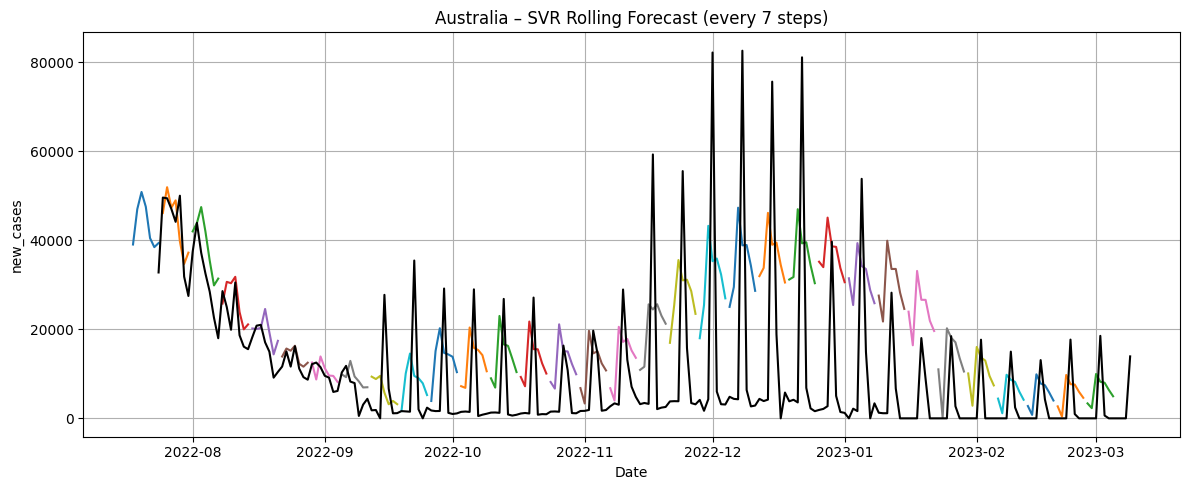

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

step = config["forecast_steps"]

for country in config["countries"]:
    country_df = results[results["country"] == country].reset_index(drop=True)

    # Sample every `forecast_steps` to reduce plot overlap
    sampled = country_df.iloc[::step]

    plt.figure(figsize=(12, 5))

    for _, row in sampled.iterrows():
        origin_date = pd.to_datetime(row["forecast_origin"])
        forecast_dates = pd.date_range(start=origin_date, periods=step, freq="D").to_pydatetime()
        preds = np.array(row["predictions"])

        if preds.ndim == 2:
            preds = preds[0]

        plt.plot(forecast_dates, preds, label=f"Forecast from {origin_date.date()}")

    # Plot ground truth from the original dataframe
    actual_series = df[df["country"] == country].sort_values("date")
    split_idx = int(len(actual_series) * config["split_ratio"])
    actual_test = actual_series.iloc[split_idx:]
    plt.plot(pd.to_datetime(actual_test["date"]), actual_test[config["target_var"]],
             label="True Values", color="black", linewidth=1.5)

    plt.title(f"{country} – SVR Rolling Forecast (every {step} steps)")
    plt.xlabel("Date")
    plt.ylabel(config["target_var"])
    plt.grid(True)
    plt.tight_layout()
    #plt.legend()
    plt.show()


In [ ]:
# Ensure working directory is at project root (where COVID_FORECASTING_MODELS lives)


print(sys.path)

['c:\\Users\\guoya\\miniconda3\\envs\\covidmodels\\python39.zip', 'c:\\Users\\guoya\\miniconda3\\envs\\covidmodels\\DLLs', 'c:\\Users\\guoya\\miniconda3\\envs\\covidmodels\\lib', 'c:\\Users\\guoya\\miniconda3\\envs\\covidmodels', '', 'c:\\Users\\guoya\\miniconda3\\envs\\covidmodels\\lib\\site-packages', 'c:\\users\\guoya\\dropbox\\academic\\uoa phd\\thesis\\data\\covid_forecasting_models\\src\\models\\newly_proposed\\deepcovid', 'c:\\Users\\guoya\\miniconda3\\envs\\covidmodels\\lib\\site-packages\\win32', 'c:\\Users\\guoya\\miniconda3\\envs\\covidmodels\\lib\\site-packages\\win32\\lib', 'c:\\Users\\guoya\\miniconda3\\envs\\covidmodels\\lib\\site-packages\\Pythonwin', 'C:\\Users\\guoya\\Dropbox\\Academic\\UOA PhD\\Thesis\\Data\\covid_forecasting_models', 'C:\\Users\\guoya\\Dropbox\\Academic\\UOA PhD\\Thesis\\Data\\covid_forecasting_models', 'C:\\Users\\guoya\\Dropbox\\Academic\\UOA PhD\\Thesis\\Data\\covid_forecasting_models']


In [5]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Setup path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

from src.models.newly_proposed.deepcovid.data_module import DeepCOVIDDataModule
from src.models.newly_proposed.deepcovid.deepcovid_runner import train_deepcovid_model

# --- Configuration ---
country = "Australia"
target_var = "new_cases"
exogenous_vars = [
    "retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", 
    "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline", 
    "StringencyIndex_Average", "ContainmentHealthIndex_Average"
]
input_window = 28
forecast_horizon = 7

# --- Load Data ---
df = pd.read_csv("../data/processed/merged_covid_data.csv", parse_dates=["date"])

# --- Prepare Data ---
dm = DeepCOVIDDataModule(
    df=df,
    target_var=target_var,
    exogenous_vars=exogenous_vars,
    country=country,
    input_window=input_window,
    forecast_horizon=forecast_horizon,
)
X, y = dm.prepare()
scaler = dm.get_scaler()

# --- Train Model ---
true_values, predictions, scaler, selected_features, history = train_deepcovid_model(
    df=df,
    country=country,
    target_var=target_var,
    exogenous_vars=exogenous_vars,
    input_window=input_window,
    forecast_horizon=forecast_horizon,
    test_ratio=0.2,
    hidden_units=64,
    dropout_rate=0.3,
    learning_rate=0.001,
    epochs=100,
    batch_size=32
)





C:\Users\guoya\Dropbox\Academic\UOA PhD\Thesis\Data\covid_forecasting_models\src\models\newly_proposed\deepcovid\data_module.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_df.fillna(method='ffill', inplace=True)
C:\Users\guoya\Dropbox\Academic\UOA PhD\Thesis\Data\covid_forecasting_models\src\models\newly_proposed\deepcovid\data_module.py:63: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(x, y)
c:\users\guoya\dropbox\academic\uoa phd\thesis\data\covid_forecasting_models\src\models\newly_proposed\deepcovid\data_module.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_df.fillna(method='ffill', inplace=True)
c:\users\guoya\dropbox\academic\uoa phd\thesis\data\covid_forecasting_models\src\models\newly_proposed\deepcovid\d

Epoch 1/100
28/28 - 1s - 24ms/step - loss: 1.7798 - val_loss: 0.6994
Epoch 2/100
28/28 - 0s - 4ms/step - loss: 1.3241 - val_loss: 0.7408
Epoch 3/100
28/28 - 0s - 4ms/step - loss: 1.1379 - val_loss: 0.7478
Epoch 4/100
28/28 - 0s - 4ms/step - loss: 1.0529 - val_loss: 0.7528
Epoch 5/100
28/28 - 0s - 4ms/step - loss: 0.9989 - val_loss: 0.8010
Epoch 6/100
28/28 - 0s - 4ms/step - loss: 0.9224 - val_loss: 0.8467
Epoch 7/100
28/28 - 0s - 4ms/step - loss: 0.9279 - val_loss: 0.7987
Epoch 8/100
28/28 - 0s - 4ms/step - loss: 0.8762 - val_loss: 0.8441
Epoch 9/100
28/28 - 0s - 4ms/step - loss: 0.8911 - val_loss: 0.7885
Epoch 10/100
28/28 - 0s - 4ms/step - loss: 0.8442 - val_loss: 0.8554
Epoch 11/100
28/28 - 0s - 4ms/step - loss: 0.8294 - val_loss: 0.8159
Epoch 12/100
28/28 - 0s - 4ms/step - loss: 0.7987 - val_loss: 0.8831
Epoch 13/100
28/28 - 0s - 4ms/step - loss: 0.8201 - val_loss: 0.9092
Epoch 14/100
28/28 - 0s - 4ms/step - loss: 0.7545 - val_loss: 0.8705
Epoch 15/100
28/28 - 0s - 4ms/step - loss:

In [6]:
predictions

array([[ 1.0060065 ,  1.0698277 ,  1.0805334 , ...,  0.90816003,
         0.8157146 ,  0.76664746],
       [ 0.9178465 ,  1.0431408 ,  1.0266114 , ...,  0.7534278 ,
         0.71656775,  0.7563209 ],
       [ 0.85635495,  0.8540308 ,  0.8152705 , ...,  0.6101348 ,
         0.74227124,  0.8417227 ],
       ...,
       [-0.405162  , -0.37082696, -0.34415877, ..., -0.27442563,
        -0.2426065 , -0.32678813],
       [-0.405162  , -0.37082696, -0.34415877, ..., -0.27442563,
        -0.2426065 , -0.32678813],
       [-0.405162  , -0.37082696, -0.34415877, ..., -0.27442563,
        -0.2426065 , -0.32678813]], dtype=float32)

C:\Users\guoya\Dropbox\Academic\UOA PhD\Thesis\Data\covid_forecasting_models\src\models\newly_proposed\deepcovid\visualize.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


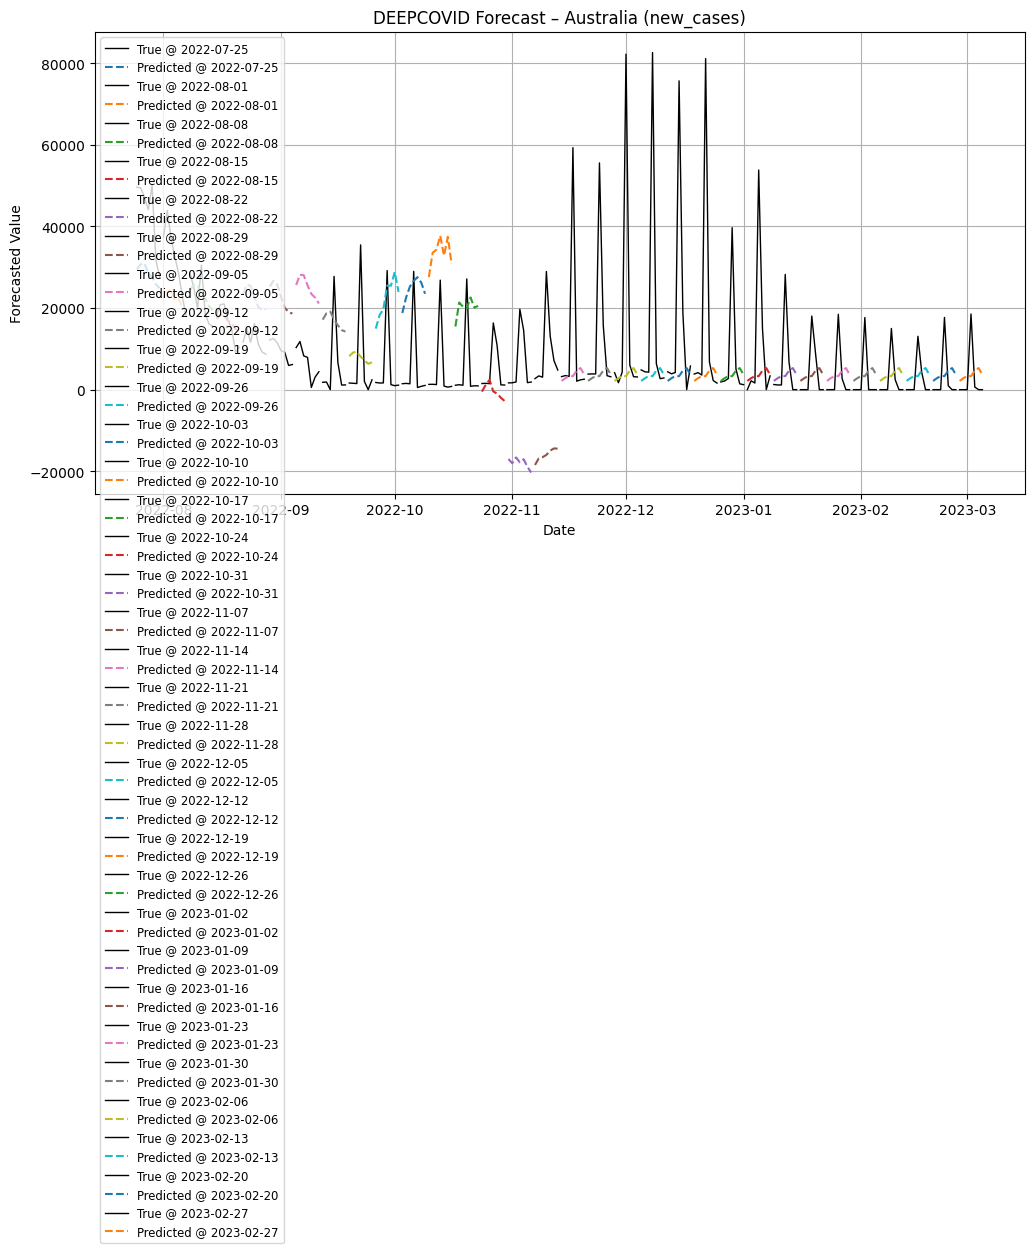

In [8]:
from src.models.newly_proposed.deepcovid.visualize import (
    inverse_transform_predictions,
    plot_deepcovid_forecasts
)

# --- Inverse transform ---
true_unscaled, pred_unscaled = inverse_transform_predictions(
    true_values, predictions, scaler, n_feats=len(selected_features)
)

# --- Plot ---
plot_deepcovid_forecasts(
    true_unscaled,
    pred_unscaled,
    country_df=df[df['country'] == country].sort_values('date').reset_index(drop=True),
    input_window=input_window,
    forecast_horizon=forecast_horizon,
    title=f"DEEPCOVID Forecast – {country} ({target_var})"
)


In [2]:
# --- Imports ---
import pandas as pd
#from pathlib import Path
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Setup path
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from src.models.newly_proposed.cnn_lstm import cnn_lstm_pipeline

# --- Load Data ---
df = pd.read_csv("../data/processed/merged_covid_data.csv", parse_dates=["date"])

# --- Configuration ---
config = {
    "country": "Australia",
    "target_var": "new_cases",
    "exogenous_vars": ["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", 
    "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline", 
    "StringencyIndex_Average", "ContainmentHealthIndex_Average"],
    "input_window": 14,
    "forecast_steps": 14,
    "split_ratio": 0.8,
    "scaler_config": {
        "type": "z_score",  # or "min_max"
        "min_max_range": (0, 1)
    },
    "cnn_config": {
        "filters": 64,
        "kernel_size": 3,
        "activation": "relu"
    },
    "lstm_config": {
        "units": 64,
        "dropout": 0.2,
        "recurrent_dropout": 0.0
    },
    "epochs": 100,
    "batch_size": 32
}

# --- Run Pipeline ---
model, true_vals, pred_vals, df_country = cnn_lstm_pipeline(df, config)



c:\Users\guoya\miniconda3\envs\covidmodels\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [4]:
pred_vals

array([[ 4.7715238e+04,  5.1888891e+04,  4.8728465e+04, ...,
         6.5018820e+04,  6.2092277e+04,  6.4340988e+04],
       [ 4.7541875e+04,  5.1994480e+04,  4.7814363e+04, ...,
         6.3652742e+04,  6.0425566e+04,  6.3105051e+04],
       [ 4.8738211e+04,  5.2817074e+04,  4.9008008e+04, ...,
         6.4451203e+04,  6.1389930e+04,  6.4324637e+04],
       ...,
       [ 1.7889694e+03,  2.8303105e+03,  1.4368025e+02, ...,
         2.0695747e+03,  2.0425123e+03,  2.4229922e+03],
       [ 1.6238297e+03,  2.6569019e+03, -7.0882988e+00, ...,
         1.8204718e+03,  1.7223121e+03,  2.1212881e+03],
       [ 1.5101500e+03,  2.5385366e+03, -1.1194279e+02, ...,
         1.6422057e+03,  1.4945934e+03,  1.9049698e+03]], dtype=float32)

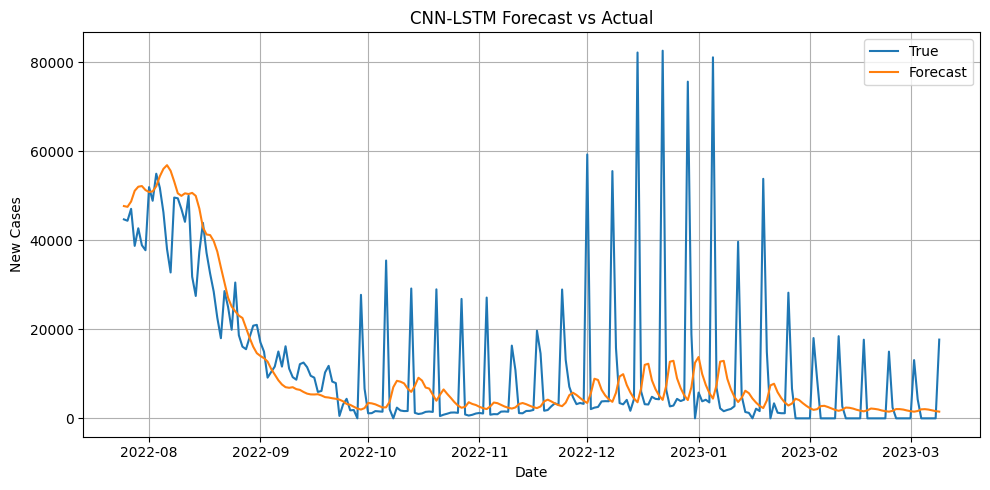

In [5]:
import numpy as np
import matplotlib.pyplot as plt
start_date = df_country.iloc[-len(true_vals)]["date"]
forecast_dates = pd.date_range(start=start_date, periods=len(true_vals))

plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, true_vals[:, 0], label="True")
plt.plot(forecast_dates, pred_vals[:, 0], label="Forecast")
plt.title("CNN-LSTM Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# EpiLearn Forecasting on Merged COVID Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from pathlib import Path
import sys

# Setup path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

from src.models.newly_proposed.epilearn.utils import (
    construct_i_and_seasonality,
    build_curve_db
)
from models.newly_proposed.epilearn.epilearn import epiinvert_forecast

# --- Configuration ---
DATA_PATH = "../data/processed/merged_covid_data.csv"
COUNTRY = "Australia"
TARGET_COL = "new_cases"
COUNTRY_COL = "country"
DATE_COL = "date"
INPUT_WINDOW = 28
FORECAST_STEPS = 14
TRAIN_RATIO = 0.8
TREND_SENTIMENT = 0.0
FORECAST_TYPE = "median"

# --- Load data ---
df = pd.read_csv(DATA_PATH, parse_dates=[DATE_COL], index_col=0)
df.sort_values(by=[COUNTRY_COL, DATE_COL], inplace=True)
df = df.dropna(subset=[TARGET_COL])

# --- Select country and split into train/test by date ---
country_df = df[df[COUNTRY_COL] == COUNTRY].copy()
split_idx = int(len(country_df) * TRAIN_RATIO)
train_df = country_df.iloc[:split_idx]
test_df = country_df.iloc[split_idx:split_idx + FORECAST_STEPS]
forecast_dates = test_df[DATE_COL].values if not test_df.empty else pd.date_range(
    start=train_df[DATE_COL].iloc[-1] + timedelta(days=1),
    periods=FORECAST_STEPS
)




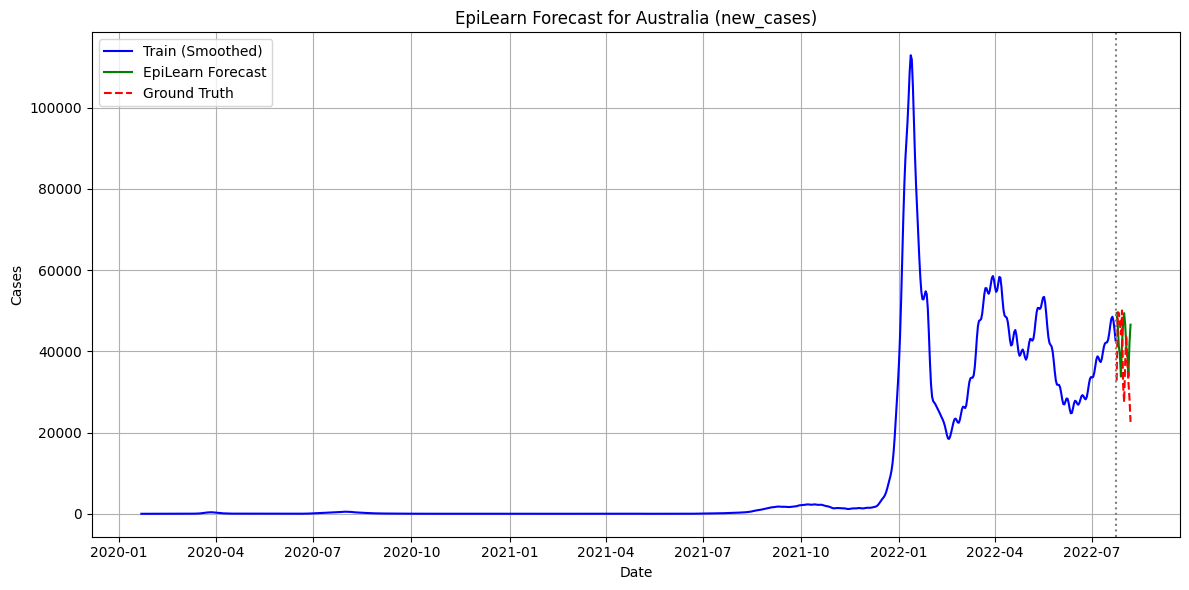

In [ ]:
# --- Construct epiinvert result (target country only) ---
i_original, i_restored, seasonality = construct_i_and_seasonality(
    df=train_df,
    country_col=COUNTRY_COL,
    target_col=TARGET_COL,
    country=COUNTRY
)
epiinvert_result = {
    "i_original": i_original,
    "i_restored": i_restored,
    "seasonality": seasonality,
    "dates": train_df[DATE_COL].dt.strftime("%Y-%m-%d").tolist()
}

# --- Build restored incidence database from all countries ---
restored_incidence_db = build_curve_db(
    df=df,
    country_col=COUNTRY_COL,
    target_col=TARGET_COL,
    country=None,
    window_size=INPUT_WINDOW + FORECAST_STEPS
)

# --- Run forecast ---
forecast_values = epiinvert_forecast(
    epiinvert_result=epiinvert_result,
    restored_incidence=restored_incidence_db,
    forecast_type=FORECAST_TYPE,
    trend_sentiment=TREND_SENTIMENT,
    n_forecast_days=FORECAST_STEPS
)



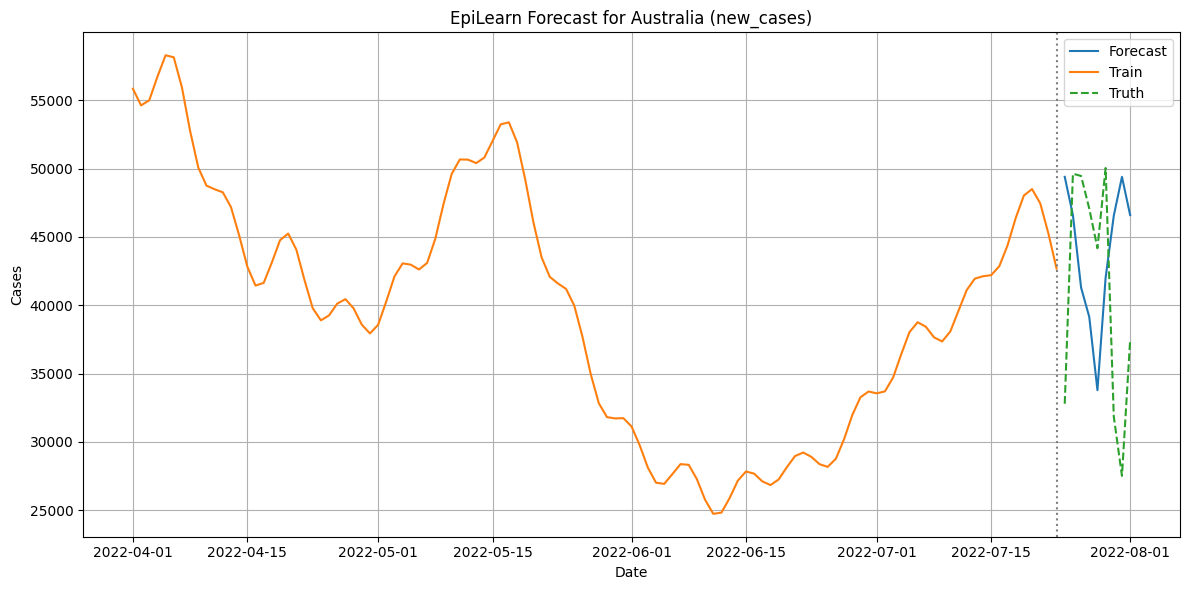

In [18]:
# --- Optional: Select date range to view ---
start_date = pd.to_datetime("2022-04-01")  # Change as needed
end_date = pd.to_datetime("2022-08-01")    # Change as needed

# Combine all parts into a single DataFrame
forecast_df = pd.DataFrame({
    "date": np.concatenate([train_df[DATE_COL].values, forecast_dates]),
    "cases": np.concatenate([i_restored[-len(train_df):], forecast_values]),
    "type": ["train"] * len(train_df) + ["forecast"] * len(forecast_dates)
})

if not test_df.empty:
    test_df_plot = test_df[[DATE_COL, TARGET_COL]].copy()
    test_df_plot.columns = ["date", "cases"]
    test_df_plot["type"] = "truth"
    forecast_df = pd.concat([forecast_df, test_df_plot], ignore_index=True)

# Filter by selected date range
forecast_df = forecast_df[(forecast_df["date"] >= start_date) & (forecast_df["date"] <= end_date)]

plt.figure(figsize=(12, 6))
for label, grp in forecast_df.groupby("type"):
    linestyle = "--" if label == "truth" else "-"
    plt.plot(grp["date"], grp["cases"], label=label.capitalize(), linestyle=linestyle)
plt.axvline(train_df[DATE_COL].iloc[-1], color='gray', linestyle=':')
plt.title(f"EpiLearn Forecast for {COUNTRY} ({TARGET_COL})")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from pathlib import Path
import sys

# Setup path
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from src.models.newly_proposed.curvefit_lstm import curvefit_lstm_pipeline

# Load your dataset
df = pd.read_csv("../data/processed/merged_covid_data.csv", parse_dates=['date'], index_col=0)

# Configuration for the pipeline
config = {
    'country': 'Australia',
    'target_col': 'new_cases',
    'curvefit_input': 'new_cases',
    'exog_vars': ["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", 
    "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline", 
    "StringencyIndex_Average", "ContainmentHealthIndex_Average"],  # adjust as needed
    'curvefit_model': 'logistic',
    'input_window': 28,
    'forecast_horizon': 14,
    'scaler': 'standard',
    'exog_scaler': 'minmax',
    'train_test_ratio': 0.8,
    'epochs': 50,
    'batch_size': 16,
    'hidden_units': 64
}

# Run the pipeline
results = curvefit_lstm_pipeline(df, config)



c:\Users\guoya\miniconda3\envs\covidmodels\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [4]:
results['Y_pred_reconstructed']

array([[44638.015625  , 44467.2109375 , 45577.27734375, ...,
        35184.67578125, 35096.11328125, 36134.3828125 ],
       [44801.60546875, 43650.8515625 , 44864.17578125, ...,
        37246.81640625, 37188.140625  , 37189.44921875],
       [45609.2265625 , 44191.51171875, 45826.9296875 , ...,
        40403.7109375 , 40260.89453125, 39256.515625  ],
       ...,
       [ 1586.31542969,  2612.54589844,   898.35058594, ...,
        11365.78417969, 12638.82128906, 16126.95703125],
       [ 1171.8359375 ,  2161.7265625 ,   234.6640625 , ...,
        10867.17285156, 12318.87792969, 16192.33105469],
       [ 3171.52734375,  3095.13134766,  3276.58007812, ...,
        11991.36914062, 15380.54492188, 15679.22851562]])

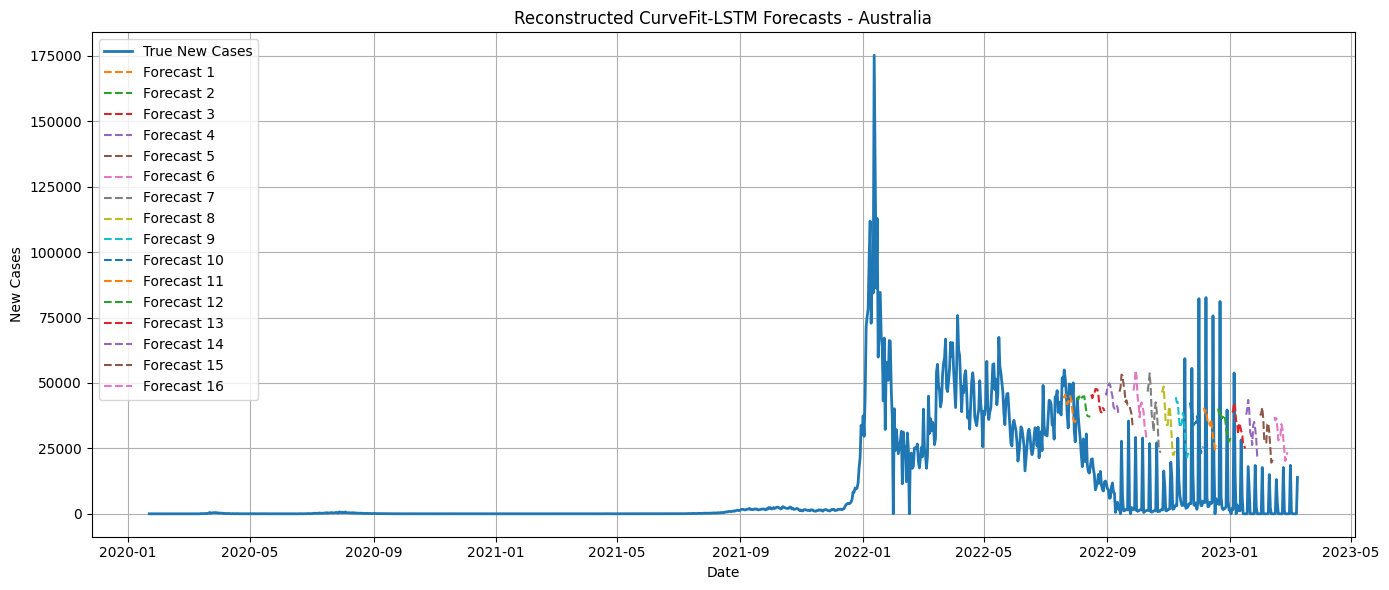

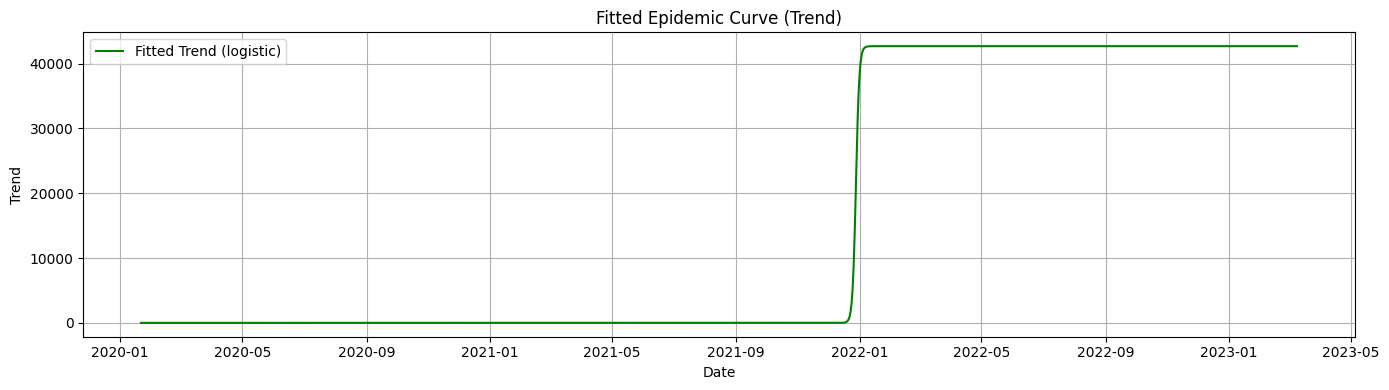

In [9]:
# 4. Plot reconstructed forecasts over original signal
plt.figure(figsize=(14, 6))
plt.plot(df[df['country'] == 'Australia']['date'], df[df['country'] == 'Australia']['new_cases'], label='True New Cases', linewidth=2)
for i, start in enumerate(results['forecast_start_indices'][::config['forecast_horizon']]):
    forecast = results['Y_pred_reconstructed'][i]
    dates = df[df['country'] == 'Australia']['date'].iloc[start:start + config['forecast_horizon']]
    if len(dates) == len(forecast):  # make sure they match
        plt.plot(dates, forecast, linestyle='--', label=f'Forecast {i+1}')
plt.title("Reconstructed CurveFit-LSTM Forecasts - Australia")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

# 5. Optional: Plot the trend
plt.figure(figsize=(14, 4))
plt.plot(df[df['country'] == 'Australia']['date'], results['trend'], label='Fitted Trend (logistic)', color='green')
plt.title("Fitted Epidemic Curve (Trend)")
plt.xlabel("Date")
plt.ylabel("Trend")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

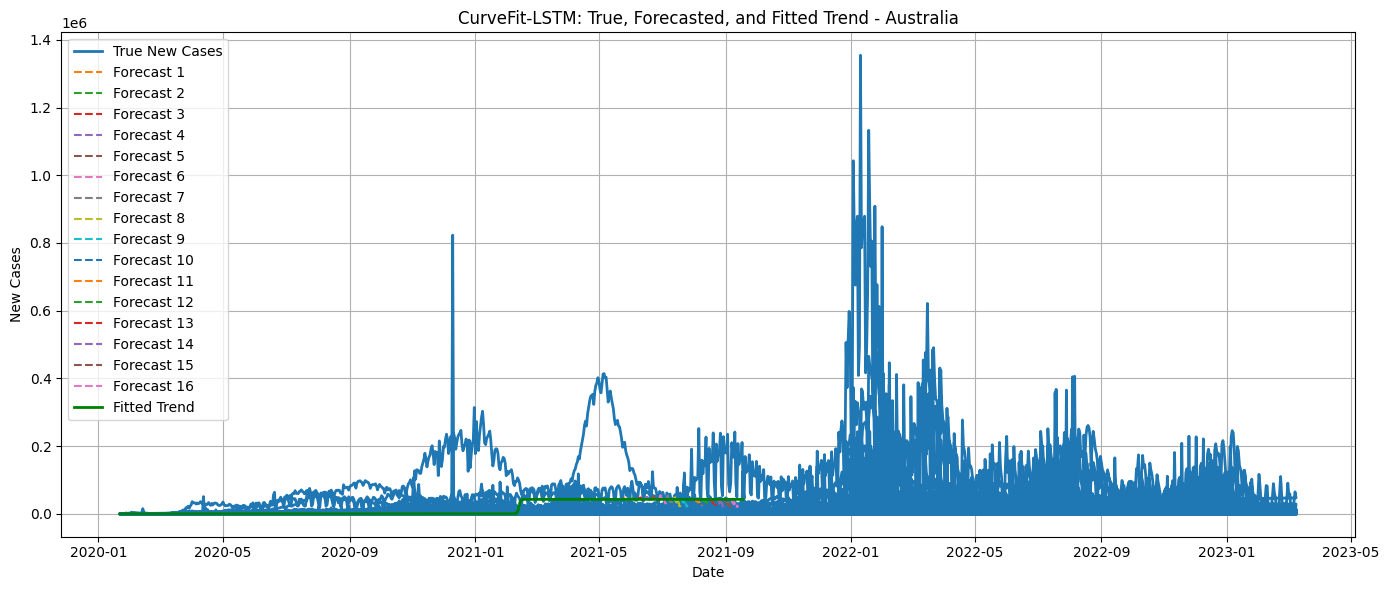

In [10]:
# 4. Plot true values, forecast, and trend in one figure
plt.figure(figsize=(14, 6))
date_series = df['date']
plt.plot(date_series, df['new_cases'], label='True New Cases', linewidth=2)

# Forecasts (non-overlapping)
for i, start in enumerate(results['forecast_start_indices'][::config['forecast_horizon']]):
    forecast = results['Y_pred_reconstructed'][i]
    forecast_dates = date_series.iloc[start:start + config['forecast_horizon']]
    if len(forecast_dates) == len(forecast):
        plt.plot(forecast_dates, forecast, linestyle='--', label=f'Forecast {i+1}')

# Fitted Trend
plt.plot(date_series[:len(results['trend'])], results['trend'], label='Fitted Trend', color='green', linewidth=2)

plt.title("CurveFit-LSTM: True, Forecasted, and Fitted Trend - Australia")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
# test_delphi_pipeline.ipynb

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import sys

# Setup path
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from src.models.newly_proposed.delphi import fit_and_forecast, load_country_data

# --- Configuration ---
config = {
    'file_path': '../data/processed/merged_covid_data.csv',
    'population_path': '../data/processed/population_global.csv',
    'country': 'Australia',
    'start_date': '2020-08-01',
    'n_days_fit': 60,
    'n_days_forecast': 30,
    'p0': [0.2, 0.5, 0.1, 0.01, 0.6, 0.2, 30],  # Optional: tune if needed
    'bounds': [
        (0.01, 1.0),   # alpha
        (0.01, 2.0),   # beta0
        (0.01, 1.0),   # gamma
        (0.001, 0.1),  # delta
        (0.0, 1.0),    # r
        (0.01, 1.0),   # k
        (0, 60)        # t0 (days from start)
    ]
}

# --- Fit and forecast ---
t_forecast, y_forecast, fitted_params = fit_and_forecast(config)



In [2]:
y_forecast

array([[2.41256549e+07, 2.41256193e+07, 2.41255832e+07, 2.41255476e+07,
        2.41255129e+07, 2.41254794e+07, 2.41254476e+07, 2.41254175e+07,
        2.41253891e+07, 2.41253624e+07, 2.41253375e+07, 2.41253143e+07,
        2.41252928e+07, 2.41252728e+07, 2.41252542e+07, 2.41252370e+07,
        2.41252211e+07, 2.41252065e+07, 2.41251929e+07, 2.41251804e+07,
        2.41251689e+07, 2.41251583e+07, 2.41251485e+07, 2.41251395e+07,
        2.41251312e+07, 2.41251236e+07, 2.41251166e+07, 2.41251102e+07,
        2.41251042e+07, 2.41250988e+07, 2.41250938e+07],
       [9.97714286e+02, 9.03226372e+02, 8.21267868e+02, 7.49392460e+02,
        6.85871362e+02, 6.29329035e+02, 5.78518085e+02, 5.32551578e+02,
        4.90869447e+02, 4.52934081e+02, 4.18218156e+02, 3.86291813e+02,
        3.56933904e+02, 3.29930479e+02, 3.05057081e+02, 2.82078743e+02,
        2.60780738e+02, 2.41064407e+02, 2.22832087e+02, 2.05978686e+02,
        1.90393157e+02, 1.75958495e+02, 1.62557470e+02, 1.50127234e+02,
       

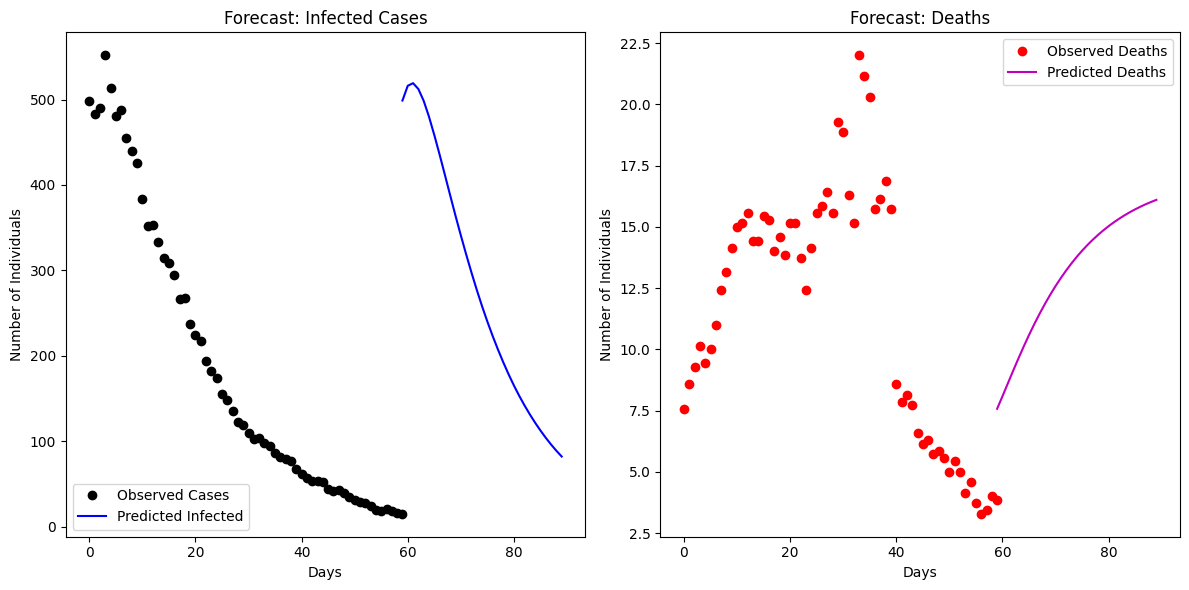

Fitted parameters:
alpha: 0.1370
beta0: 0.1734
gamma: 0.2206
delta: 0.0010
r: 0.9971
k: 0.0100
t0: 19.4944


In [3]:
# --- Load actual data for plotting ---
t_data, actual_cases, actual_deaths, _ = load_country_data(
    config['file_path'],
    config['population_path'],
    config['country'],
    config['start_date'],
    config['n_days_fit']
)

# --- Plot results ---
plt.figure(figsize=(12, 6))

# Infected
plt.subplot(1, 2, 1)
plt.plot(t_data, actual_cases, 'ko', label='Observed Cases')
plt.plot(t_forecast, y_forecast[2], 'b-', label='Predicted Infected')
plt.title('Forecast: Infected Cases')
plt.xlabel('Days')
plt.ylabel('Number of Individuals')
plt.legend()

# Deaths
plt.subplot(1, 2, 2)
plt.plot(t_data, actual_deaths, 'ro', label='Observed Deaths')
plt.plot(t_forecast, y_forecast[4], 'm-', label='Predicted Deaths')
plt.title('Forecast: Deaths')
plt.xlabel('Days')
plt.ylabel('Number of Individuals')
plt.legend()

plt.tight_layout()
plt.show()

# --- Output fitted parameters ---
print("Fitted parameters:")
param_names = ['alpha', 'beta0', 'gamma', 'delta', 'r', 'k', 't0']
for name, val in zip(param_names, fitted_params):
    print(f"{name}: {val:.4f}")
